In [ ]:
import requests
from bs4 import BeautifulSoup
import time

def scrape_suumo(base_url, max_pages=5):
    properties = []
    
    for page in range(1, max_pages + 1):
        print(f"Scraping page {page}...")
        
        # ページ番号を動的に構築
        current_url = f"{base_url}?page={page}"
        
        # ページのHTMLを取得
        response = requests.get(current_url)
        if response.status_code != 200:
            print(f"Failed to retrieve page {page}: {response.status_code}")
            break
        soup = BeautifulSoup(response.content, 'html.parser')

        # スクレイピング
        for item in soup.find_all('div', class_='cassetteitem'):
            name = item.find('div', class_='cassetteitem_content-title').text.strip()
            rent = item.find('span', class_='cassetteitem_other-emphasis').text.strip()
            layout = item.find('span', class_='cassetteitem_madori').text.strip()
            area = item.find('span', class_='cassetteitem_menseki').text.strip()
            distance = item.find('li', class_='cassetteitem_detail-col3').text.strip()
            properties.append((name, rent, layout, area, distance))
        
        # 負荷軽減のため1秒間待機
        time.sleep(1)

    return properties

base_url = "https://suumo.jp/chintai/tokyo/sc_shibuya/"
data = scrape_suumo(base_url, max_pages=20)
print(f"取得した物件数: {len(data)}")

Scraping page 1...


NameError: name 'current_url' is not defined

In [69]:
import sqlite3

def save_to_db(data, db_path='real_estate.db'):
    connection = sqlite3.connect(db_path)
    cursor = connection.cursor()

    # テーブル作成
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS properties (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT,
        rent REAL,
        layout TEXT,
        area REAL,
        distance TEXT
    )
    ''')

    # データ挿入
    cursor.executemany('''
    INSERT INTO properties (name, rent, layout, area, distance)
    VALUES (?, ?, ?, ?, ?)
    ''', data)

    connection.commit()
    connection.close()

# データ保存
save_to_db(data)

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

       rent  distance
0  130000.0      35.0
1  238000.0       6.0
2  215000.0      25.0
3  216000.0      13.0
4  216000.0      13.0


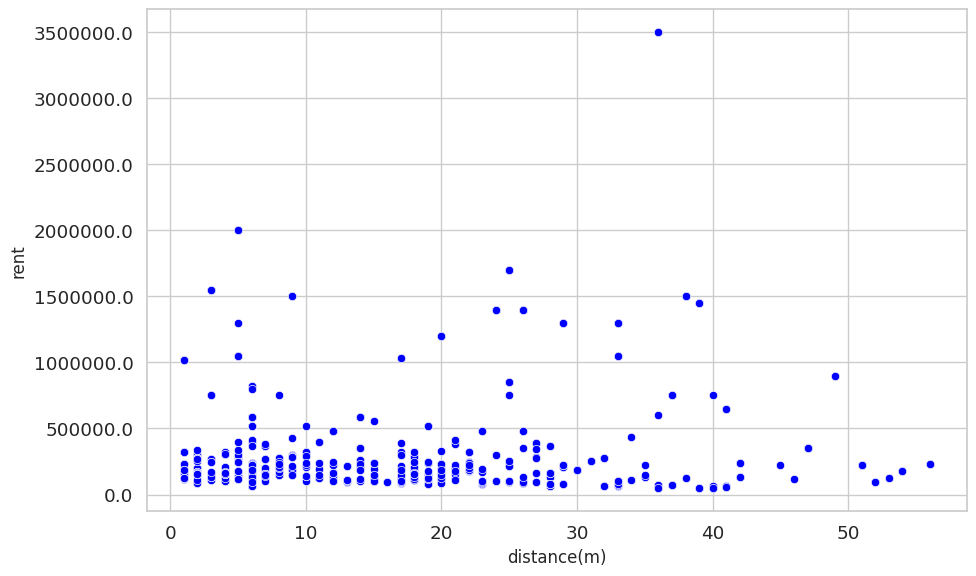

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import matplotlib.ticker as ticker

def analyze_rent_vs_distance(db_path='real_estate.db'):
    # データベースからデータを取得
    connection = sqlite3.connect(db_path)
    query = "SELECT rent, distance FROM properties"
    df = pd.read_sql_query(query, connection)
    connection.close()

    # 距離を数値化（例: "徒歩10分" -> 10）
    df['distance'] = df['distance'].str.extract(r'(\d+)').astype(float)

    # 賃料を数値型に変換（例: "18.5万円" -> 185000）
    df['rent'] = df['rent'].str.replace('万円', '').astype(float) * 10000

    # 正常に変換されたか確認
    print(df.head())

    # 散布図を作成
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='distance', y='rent', color='blue')

    # グラフタイトルと軸ラベルの設定
    plt.xlabel('distance(m)', fontsize=12)
    plt.ylabel('rent', fontsize=12)

    # y軸の目盛りを10000単位に設定 
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x}'))
    
    
    # レイアウト調整と表示
    plt.tight_layout()
    plt.show()

# 実行例
analyze_rent_vs_distance()

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

       rent  distance
0  130000.0      35.0
1  238000.0       6.0
2  215000.0      25.0
3  216000.0      13.0
4  216000.0      13.0


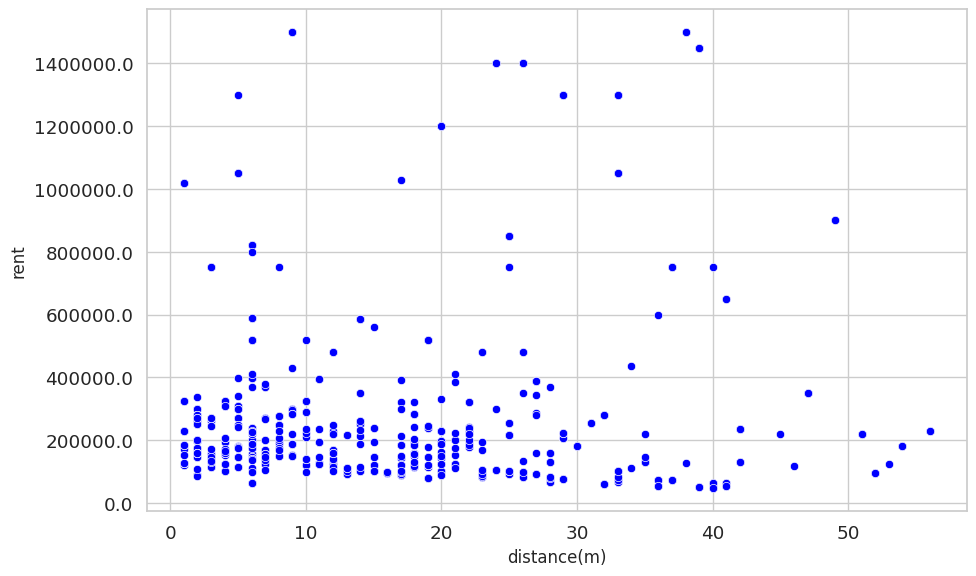

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import matplotlib.ticker as ticker

def analyze_rent_vs_distance(db_path='real_estate.db'):
    # データベースからデータを取得
    connection = sqlite3.connect(db_path)
    query = "SELECT rent, distance FROM properties"
    df = pd.read_sql_query(query, connection)
    connection.close()

    # 距離を数値化（例: "徒歩10分" -> 10）
    df['distance'] = df['distance'].str.extract(r'(\d+)').astype(float)

    # 賃料を数値型に変換（例: "18.5万円" -> 185000）
    df['rent'] = df['rent'].str.replace('万円', '').astype(float) * 10000

    # 家賃を150万以下に制限
    df = df[df['rent'] <= 1500000]

    # 正常に変換されたか確認
    print(df.head())

    # 散布図を作成
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='distance', y='rent', color='blue')

    # グラフタイトルと軸ラベルの設定
    plt.xlabel('distance(m)', fontsize=12)
    plt.ylabel('rent', fontsize=12)

    # y軸の目盛りを10000単位に設定 
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x}'))
    
    
    # レイアウト調整と表示
    plt.tight_layout()
    plt.show()

# 実行例
analyze_rent_vs_distance()

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

       rent  distance
0  130000.0      35.0
1  238000.0       6.0
2  215000.0      25.0
3  216000.0      13.0
4  216000.0      13.0


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.


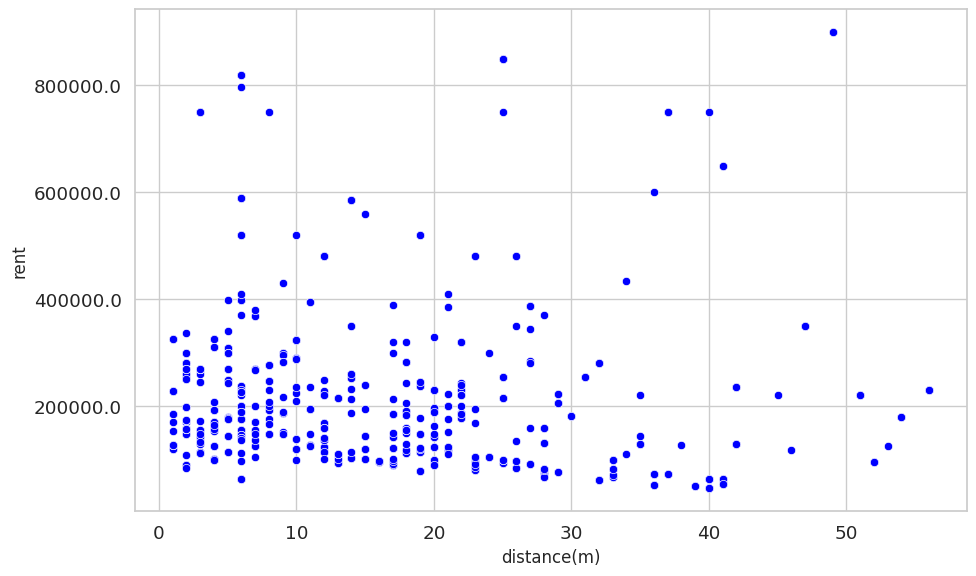

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import matplotlib.ticker as ticker

def analyze_rent_vs_distance(db_path='real_estate.db'):
    # データベースからデータを取得
    connection = sqlite3.connect(db_path)
    query = "SELECT rent, distance FROM properties"
    df = pd.read_sql_query(query, connection)
    connection.close()

    # 距離を数値化（例: "徒歩10分" -> 10）
    df['distance'] = df['distance'].str.extract(r'(\d+)').astype(float)

    # 賃料を数値型に変換（例: "18.5万円" -> 185000）
    df['rent'] = df['rent'].str.replace('万円', '').astype(float) * 10000

    # 家賃を150万以下に制限
    df = df[df['rent'] <= 1000000]

    # 正常に変換されたか確認
    print(df.head())

    # 散布図を作成
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='distance', y='rent', color='blue')

    # グラフタイトルと軸ラベルの設定
    plt.xlabel('distance(m)', fontsize=12)
    plt.ylabel('rent', fontsize=12)

    # y軸の目盛りを10000単位に設定 
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x}'))
    
    
    # レイアウト調整と表示
    plt.tight_layout()
    plt.show()

# 実行例
analyze_rent_vs_distance()

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

       rent  distance
0  130000.0      35.0
1  238000.0       6.0
2  215000.0      25.0
3  216000.0      13.0
4  216000.0      13.0


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.


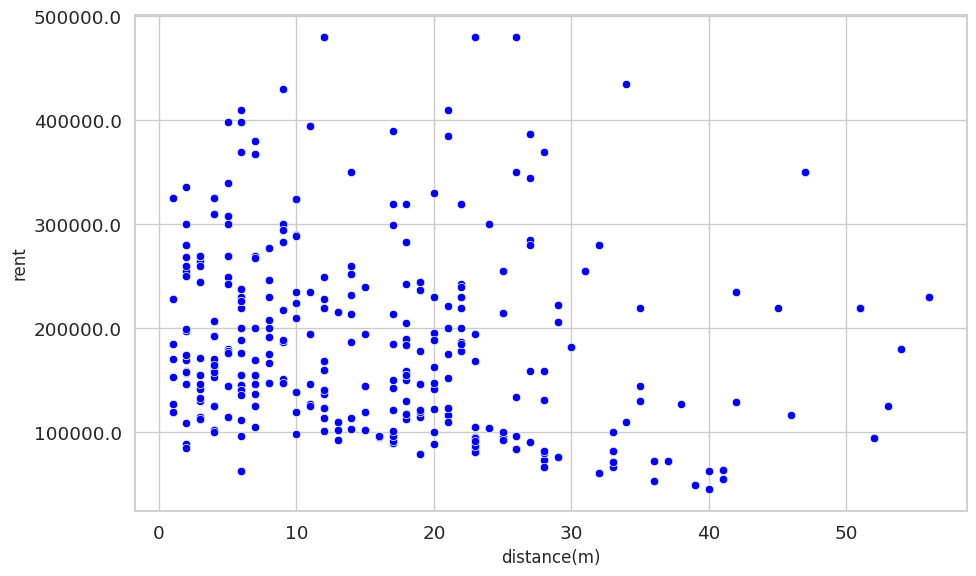

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import matplotlib.ticker as ticker

def analyze_rent_vs_distance(db_path='real_estate.db'):
    # データベースからデータを取得
    connection = sqlite3.connect(db_path)
    query = "SELECT rent, distance FROM properties"
    df = pd.read_sql_query(query, connection)
    connection.close()

    # 距離を数値化（例: "徒歩10分" -> 10）
    df['distance'] = df['distance'].str.extract(r'(\d+)').astype(float)

    # 賃料を数値型に変換（例: "18.5万円" -> 185000）
    df['rent'] = df['rent'].str.replace('万円', '').astype(float) * 10000

    # 家賃を150万以下に制限
    df = df[df['rent'] <= 500000]

    # 正常に変換されたか確認
    print(df.head())

    # 散布図を作成
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='distance', y='rent', color='blue')

    # グラフタイトルと軸ラベルの設定
    plt.xlabel('distance(m)', fontsize=12)
    plt.ylabel('rent', fontsize=12)

    # y軸の目盛りを10000単位に設定 
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x}'))
    
    
    # レイアウト調整と表示
    plt.tight_layout()
    plt.show()

# 実行例
analyze_rent_vs_distance()